In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv(r"C:\Users\GASTO\Downloads\prepared_df (1).csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [5]:
# check for the missingness of the data
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
df.shape

(11991, 10)

In [7]:
# to perform descriptive statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df_enc=df.copy()

In [10]:
df_enc["left"].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [14]:
df_enc.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
left,,,,,,,,,,,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,0.637600,0.081800,0.060900,0.051200,0.048800,0.038400,0.056100,0.057600,0.268900,0.150900,0.185400
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,0.434455,0.079357,0.042692,0.054746,0.056755,0.026118,0.056253,0.055249,0.276243,0.156705,0.195881


this are the conditions considered for left to either be '0' or left to be '1'

In [12]:
# conduct encoding on the categorical variable
# Encode the `salary` column as an ordinal numeric category
df_enc["salary"] = (
    df_enc["salary"]
    .astype("category")
    .cat.set_categories(["low", "medium", "high"])
    .cat.codes
)

In [13]:
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,2,False,False,False,False,True,False,False,False,False,False
11987,0.74,0.95,5,266,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False
11988,0.85,0.54,3,185,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False
11989,0.33,0.65,3,172,10,0,0,1,2,False,False,False,False,False,True,False,False,False,False


In [15]:
percentile_25 = df_enc["tenure"].quantile(0.25)
percentile_75 = df_enc["tenure"].quantile(0.75)

In [16]:
# interquatile range to check the outliers
iqr = percentile_75 - percentile_25
iqr

np.float64(1.0)

In [18]:
upper = (percentile_75 + 1.5) * iqr
lower = (percentile_25 - 1.5) * iqr

In [19]:
print(upper)
print(lower)

5.5
1.5


In [20]:
df_lr = df_enc[(df_enc["tenure"] >= lower) & (df_enc["tenure"] <= upper)]
df_lr


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,0.72,0.64,4,192,3,0,0,0,1,False,False,False,False,False,False,False,True,False,False
11977,0.48,0.50,5,142,4,0,0,0,1,True,False,False,False,False,False,False,False,False,False
11978,0.19,0.79,4,229,4,0,0,0,1,False,False,False,False,False,False,True,False,False,False
11983,0.62,0.85,3,237,3,1,0,0,1,True,False,False,False,False,False,False,False,False,False


In [21]:
X = df_lr.drop("left", axis=1)
y = df_lr["left"]


In [22]:
X

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,0.72,0.64,4,192,3,0,0,1,False,False,False,False,False,False,False,True,False,False
11977,0.48,0.50,5,142,4,0,0,1,True,False,False,False,False,False,False,False,False,False
11978,0.19,0.79,4,229,4,0,0,1,False,False,False,False,False,False,True,False,False,False
11983,0.62,0.85,3,237,3,1,0,1,True,False,False,False,False,False,False,False,False,False


In [23]:
y

0        1
2        1
3        1
4        1
5        1
        ..
11976    0
11977    0
11978    0
11983    0
11990    0
Name: left, Length: 11167, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0, stratify=y)

In [25]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11167, 18)
(8375, 18)
(2792, 18)
(8375,)
(2792,)


# data standazation

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
X_test_scaled = scaler.transform(X_test)

# training the model

In [28]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',degree=2)
svc_model.fit(X_train_scaled,y_train)

SVC(degree=2)

In [29]:
y_train_svc=svc_model.predict(X_train_scaled)
y_test_svc=svc_model.predict(X_test_scaled)

In [30]:
mse_train=mean_squared_error(y_train_svc,y_train)
mse_test=mean_squared_error(y_test_svc,y_test)
print(f'mean squared error(train):{mse_train}')
print(f'mean_squared_error(test):{mse_test}')
As_train=accuracy_score(y_train_svc,y_train)
As_test=accuracy_score(y_test_svc,y_test)
print(f'accuracy_score(train):{As_train}')
print(f'accuracy_score(test):{As_test}')

mean squared error(train):0.034865671641791045
mean_squared_error(test):0.03474212034383954
accuracy_score(train):0.965134328358209
accuracy_score(test):0.9652578796561605


# naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(X_train_scaled,y_train)
y_train_naive=naive_model.predict(X_train_scaled)
y_test_naive=naive_model.predict(X_test_scaled)

In [32]:
mse_train=mean_squared_error(y_train_naive,y_train)
mse_test=mean_squared_error(y_test_naive,y_test)
print(f'mean_squared_error(train):{mse_train}')
print(f'mean_squared_error(test):{mse_test}')
As_train=accuracy_score(y_train_naive,y_train)
As_test=accuracy_score(y_test_naive,y_test)
print(f'accuracy_score(train):{As_train}')
print(f'accuracy_score(test):{As_test}')

mean_squared_error(train):0.14256716417910448
mean_squared_error(test):0.1414756446991404
accuracy_score(train):0.8574328358208955
accuracy_score(test):0.8585243553008596


# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [34]:
y_train_knn=knn_model.predict(X_train_scaled)
y_test_knn=knn_model.predict(X_test_scaled)

In [35]:
mse_train=mean_squared_error(y_train_knn,y_train)
mse_test=mean_squared_error(y_test_knn,y_test)
print(f'mean_squared_error(train):{mse_train}')
print(f'mean_squared_error(test):{mse_test}')
As_train=accuracy_score(y_train_knn,y_train)
As_test=accuracy_score(y_test_knn,y_test)
print(f"accuracy_score(train):{As_train}")
print(f'accuracy_score(test):{As_test}')

mean_squared_error(train):0.036417910447761194
mean_squared_error(test):0.04083094555873926
accuracy_score(train):0.9635820895522388
accuracy_score(test):0.9591690544412608


# Decision trees

In [109]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [110]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

- max_depth shows how deep can i tree be ... if its one node then its a depth of '1' ,try different depth to see the best outcome.
- 

In [111]:
predictions=clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [112]:
# proba gives us the probability foe each class
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
accuracy_score(y_test,predictions)

0.9727793696275072

In [40]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,predictions,labels=[0,1])
matrix

array([[2280,   41],
       [  35,  436]])

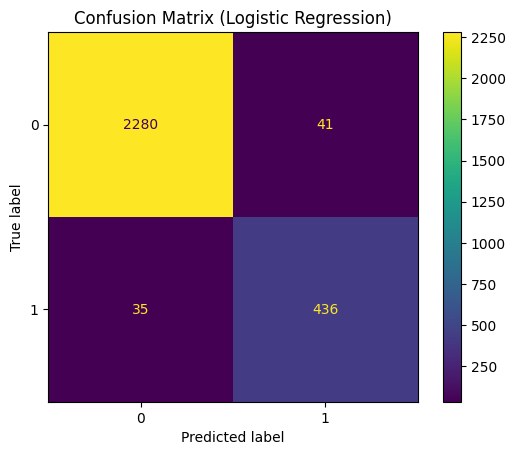

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(matrix).plot()
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [42]:
from sklearn.metrics import  precision_score
precision_score(y_test,predictions)

np.float64(0.9140461215932913)

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions)

np.float64(0.9256900212314225)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2321
           1       0.91      0.93      0.92       471

    accuracy                           0.97      2792
   macro avg       0.95      0.95      0.95      2792
weighted avg       0.97      0.97      0.97      2792



In [45]:
feature_names=X.columns
feature_names


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [46]:
clf.feature_importances_

array([0.59951274, 0.13185229, 0.10783302, 0.        , 0.16080195,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [47]:
feature_importance = pd.DataFrame(clf.feature_importances_,index=feature_names.sort_values())
feature_importance

,0
average_monthly_hours,0.599513
department_IT,0.131852
department_RandD,0.107833
department_accounting,0.000000
department_hr,0.160802
department_management,0.000000
department_marketing,0.000000
department_product_mng,0.000000
department_sales,0.000000
department_support,0.000000


<Axes: >

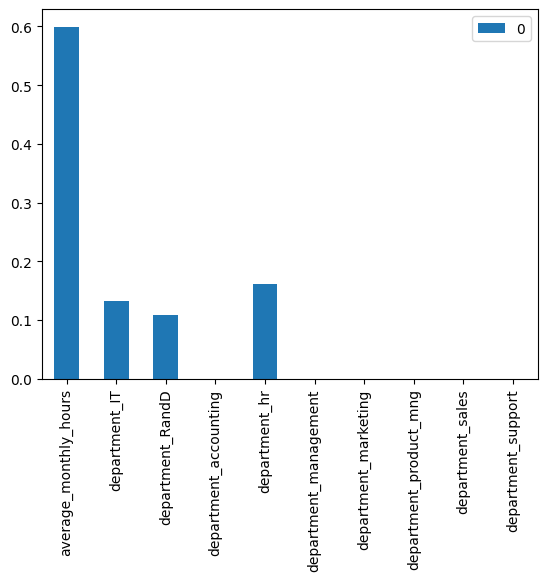

In [48]:
feature_importance.head(10).plot(kind='bar')

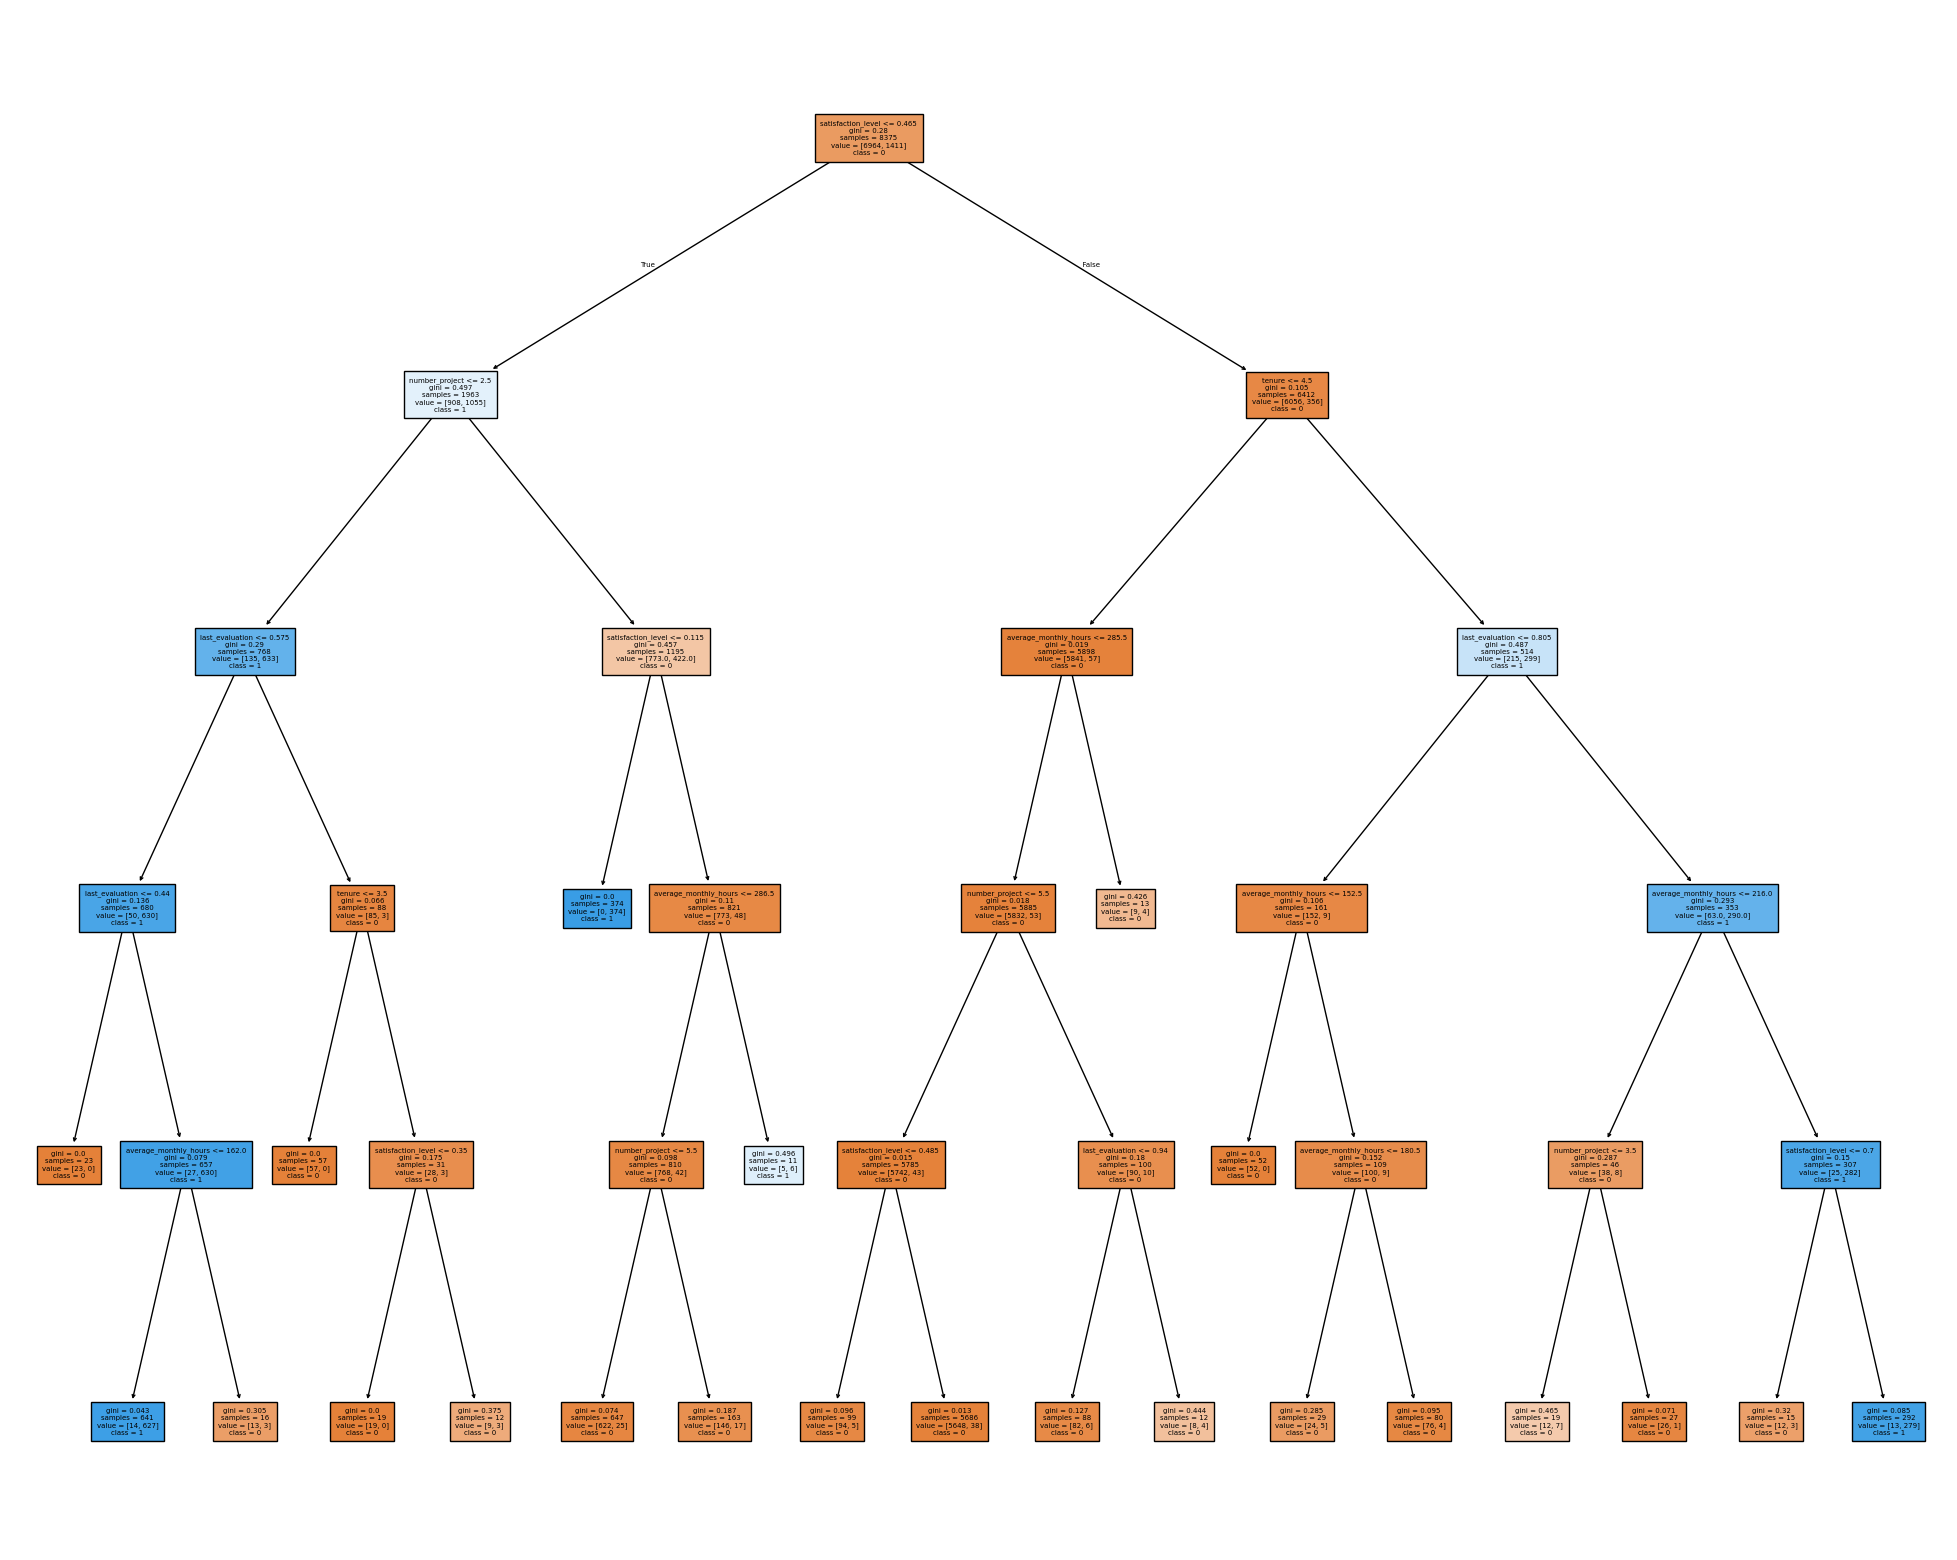

In [113]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
    max_depth=5, min_samples_split=20, min_samples_leaf=10,criterion='gini'
)# set the min_sample _fit to a larger number to avoid frequent splitting that may lead to over fitting
clf.fit(X_train, y_train)

fig=plt.figure(figsize=(25,20))
_ =tree.plot_tree(clf,
            feature_names=feature_names,
            class_names=('0','1'),
            filled=True,
            fontsize=5)

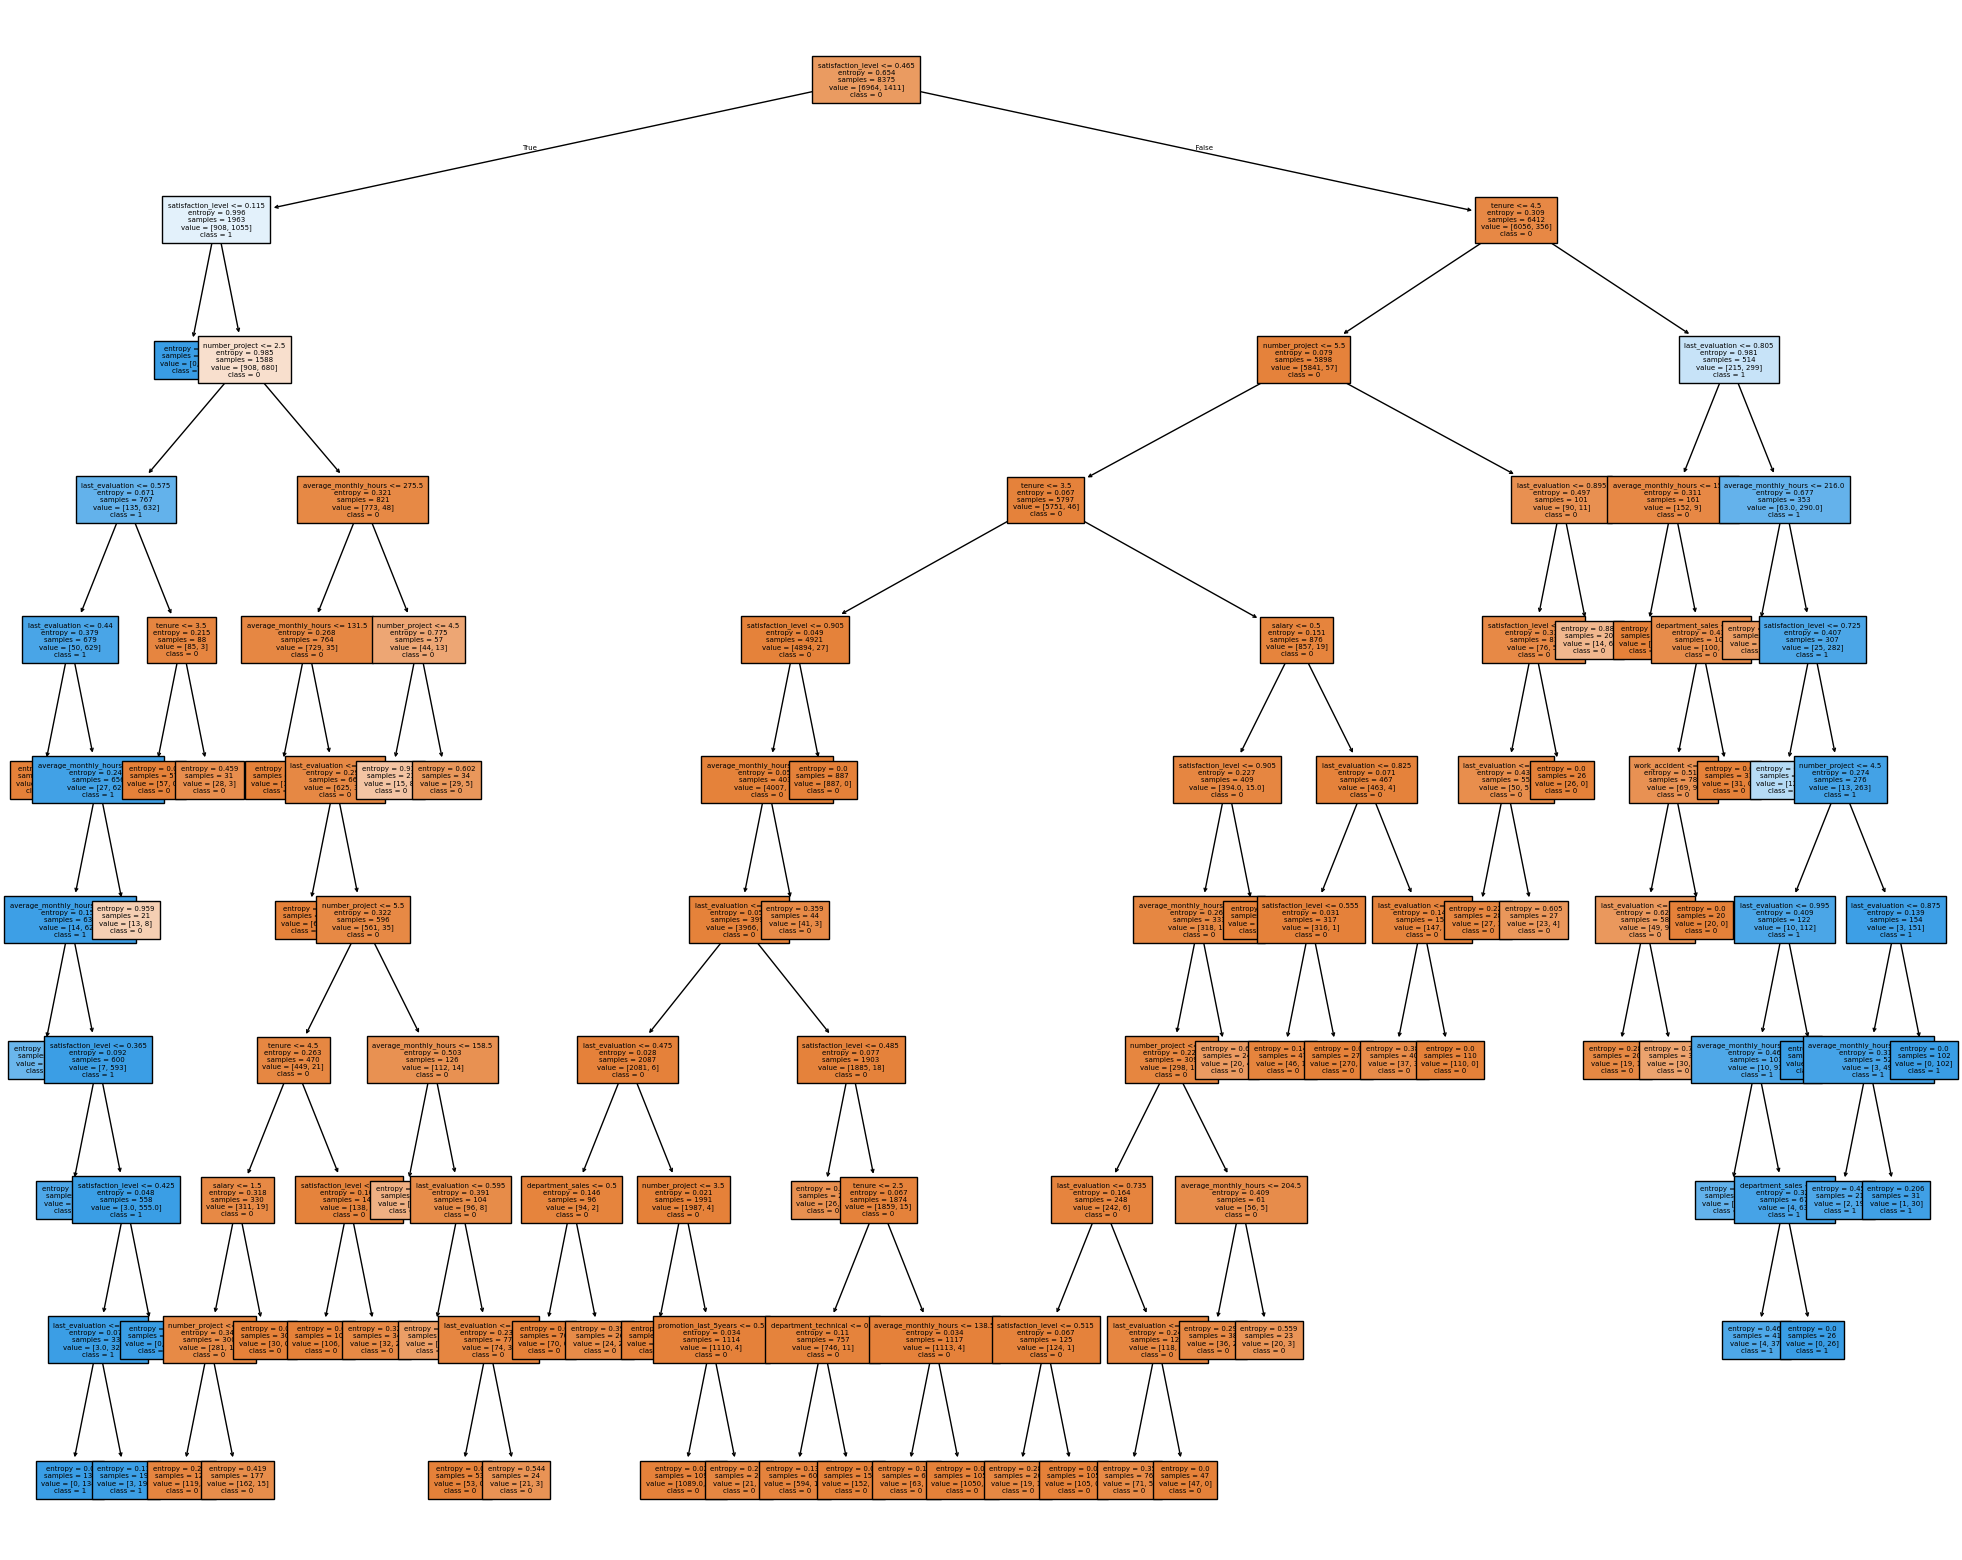

In [114]:

clf_entropy = tree.DecisionTreeClassifier( max_depth=10, min_samples_split=50, min_samples_leaf=20, criterion="entropy",  )
clf_entropy.fit(X_train, y_train)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    clf_entropy,
    feature_names=feature_names,
    class_names=("0", "1"),
    filled=True,
    fontsize=5,
)
plt.show()

# Ensemble Methods
-  Bagging
  - involves  training multiple versions of a model on different random subsets  of the training data ( with replacement )and then aggregating their predictions.

  - this reduces variance and helps in dealing with overfitting

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn .model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
df_enc= load_iris()
X,y=df_enc.data,df_enc.target


In [52]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'Random forest Accuracy:{accuracy_score(y_test,y_pred)}')

Random forest Accuracy:0.9860315186246418


# Boosting
- boosting is an ensemble method thatseeks to change the trainig data to focus attention on examples that previous fit the model on the training dataset have gotten wrong
- it sequentially trains the model ,each trying to correct the errors made by the previous ones.

# key elements of boosting is as follows:
- Bias trainig  data toward those examples that are hard to predict.

- Iteratively adds ensemble members to correct predictions of prior models.

- combines predictions using a weighted average of models

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
y_pred=model.predict(X_test)
print(f'Gradient Boosting Classifier:{accuracy_score(y_test,y_pred)}')

Gradient Boosting Classifier:0.9842406876790831


# stacking 
- involves training multiple diffrent models (base models) and then training a meta_model to make the final prediction based on the outputs of the base model.
- has its owns nomenclature :

                  - ensembled members are reffered to as level_0 models

                  - the combining prediction model  are reffered as level  1 
                  
- # popular ensemble algorithms 
   - Stacked Models( canonical stacking) 
   - Blending
   - super Ensemble                 

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [60]:
estimates=[
    ('rf',RandomForestClassifier(n_estimators=20,random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('svm',SVC(probability=True,random_state=42))
]

model= StackingClassifier(estimators=estimates,final_estimator=LogisticRegression())
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(f'Stacking Classifier Accuracy:{accuracy_score(y_test,y_pred)}')

Stacking Classifier Accuracy:0.9853151862464183


# VOTING

- deals with muitiple models and makes predictions based on the majority vote for classification(hard voting) or the average of predicted probabilities.

- examples;

- hard voting - each model votes for a class and the class with majority of the votes is selected as the final

- soft voting- each model outputs probabilities for each class and the average probability is used to make the final prediction 

In [59]:
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression(random_state=42)
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model3=GradientBoostingClassifier(n_estimators=100,random_state=42)
model=VotingClassifier(estimators=[('lr',model1),('rf',model2),('gb',model3)],voting='soft')
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(f'Voting Classifier Accuracy:{accuracy_score(y_test,y_pred)}')

Voting Classifier Accuracy:0.9856733524355301



# Precision _Recall Curve

- precision- ratio of true positive prediction to the total number of positive predictions(True positive +False positives)

- Recall(Detection Rate) the ratio of true positive prediction to the total number of actual positive (True positive + False Negatives)

- The Precision _Recall Curve plots Precision against Recall for diffirent thresholds

- uswlful when dealing with imbalanced data ,where the number of positive instances is much smaller than the number of negative instances

# evaluating the performance of binary classification model

In [63]:
from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    roc_auc_score,
    RocCurveDisplay,
)

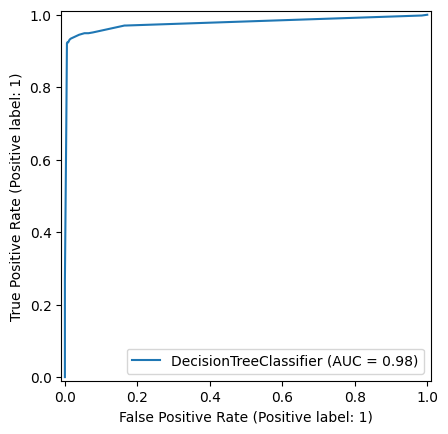

In [64]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [65]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = SVC(probability=True)

In [66]:
clf3 = SVC(probability=True)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

 creating roc subplots

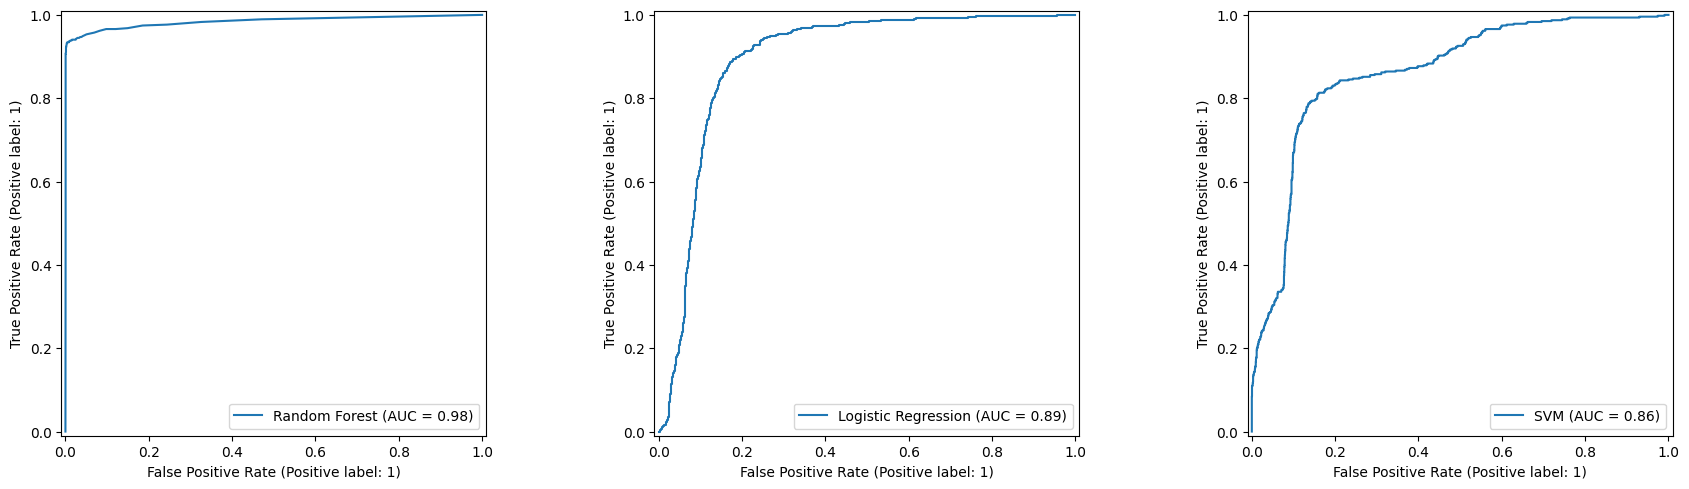

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))


RocCurveDisplay.from_estimator(clf1, X_test, y_test, name="Random Forest", ax=axs[0])
RocCurveDisplay.from_estimator( clf2, X_test, y_test, name="Logistic Regression", ax=axs[1])
RocCurveDisplay.from_estimator(clf3, X_test, y_test, name="SVM", ax=axs[2])

# Display the plots
plt.tight_layout()
plt.show()

- Random Forest(rf): The best performer among the three, with an AUC of 0.98,that is highly,effective at distinguishing between the positive and negative classes.

- Logistic Regression: Performs well with an AUC of 0.89,it's a well-understood model that often performs well on a wide range of tasks.
- SVM: Slightly less effective with an AUC of 0.86, but still a reasonably good model.

- Models with a higher AUC are generally considered to be more effective at making predictions hence random forest is our best model

In [70]:
y_true = y_test
y_scores_rf = model.predict_proba(X_test)[:, 1]

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [72]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_scores_rf)
youden_index_rf = tpr_rf - fpr_rf
best_threshold_index_rf = np.argmax(youden_index_rf)
best_threshold_rf = thresholds_rf[best_threshold_index_rf]
print(f"Best Threshold by Youden's Index: {best_threshold_rf:.2f}")
print(f"Corresponding TPR (Sensitivity): {tpr_rf[best_threshold_index_rf]:.2f}")
print(f"Corresponding FPR: {fpr_rf[best_threshold_index_rf]:.2f}")

Best Threshold by Youden's Index: 0.52
Corresponding TPR (Sensitivity): 1.00
Corresponding FPR: 1.00


- from these values we can say there is poor implimentation as the P ration of successfully classifying the positive instances is 100% how ever missleading due to the ratio of FPR that says that the misinterpretation of negative classes were also 100%.


In [73]:
from sklearn.metrics import roc_curve, auc

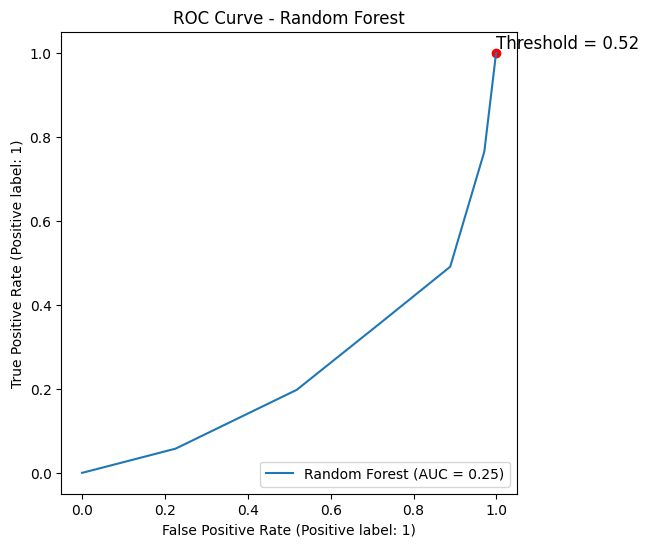

In [74]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.scatter(
    fpr_rf[best_threshold_index_rf], tpr_rf[best_threshold_index_rf], color="red"
)
plt.text(
    fpr_rf[best_threshold_index_rf],
    tpr_rf[best_threshold_index_rf],
    f"Threshold = {best_threshold_rf:.2f}",
    fontsize=12,
    verticalalignment="bottom",
)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")

- The ROC curve also proves the poor performance of the model  as the curve is almost a straight diagonal line  that  rises from (0,0) to (1,1)

# logistic regression

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_true = y_test
y_scores = model.predict_proba(X_test)[:, 1]

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true, y_scores)
youden_index_lr = tpr_lr - fpr_lr
best_threshold_index_lr = np.argmax(youden_index_lr)
best_threshold_lr = thresholds_lr[best_threshold_index_lr]
print(f"Best Threshold by Youden's Index: {best_threshold_lr:.2f}")
print(f"Corresponding TPR (Sensitivity): {tpr_lr[best_threshold_index_lr]:.2f}")
print(f"Corresponding FPR: {fpr_lr[best_threshold_index_lr]:.2f}")

Best Threshold by Youden's Index: 0.19
Corresponding TPR (Sensitivity): 0.89
Corresponding FPR: 0.17


- threshold of 0.19  is the best trade_off between the sensitivity and specificity .

- a higher sensitivity(that is correctly identified  positives) of 0.89 shows that the model is very effective at identifying positive instances .

- there is moderate  rate of false positive (0.17).( proportion of negatives that are incorrectly classified)

- recall under probability we say that ;

       - probability of success is p ( sensitivity)
       
       - probability of failure is q that is represented as (1-p) here (-p) is the negative cases incorrectly classified


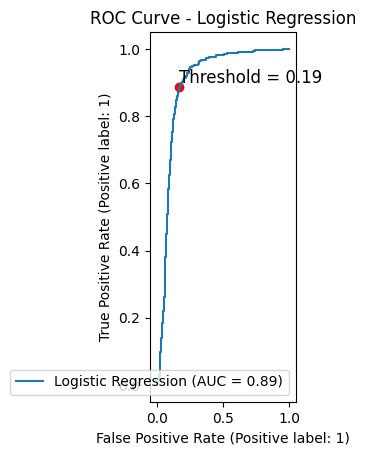

In [78]:
plt.subplot(1, 3, 2)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")
plt.scatter(
    fpr_lr[best_threshold_index_lr], tpr_lr[best_threshold_index_lr], color="red"
)
plt.text(
    fpr_lr[best_threshold_index_lr],
    tpr_lr[best_threshold_index_lr],
    f"Threshold = {best_threshold_lr:.2f}",
    fontsize=12,
    verticalalignment="bottom",
)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")

- this models shows its performing well due to the step rise of ROC curve towards the top_left corrner  implying that TPR is highand FPR is low.

- the AUC valuee of 0.89 confirms the model is effective in distinguishing between positive and negative instances


# svm 

In [81]:
model_svm = SVC(probability=True)  
model_svm.fit(X_train, y_train)
y_true = y_test
y_scores_svm = model_svm.decision_function(X_test)

In [82]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_true, y_scores_svm)
youden_index_svm = tpr_svm - fpr_svm
best_threshold_index_svm = np.argmax(youden_index_svm)
best_threshold_svm = thresholds_svm[best_threshold_index_svm]
print(f"Best Threshold by Youden's Index: {best_threshold_svm:.2f}")
print(f"Corresponding TPR (Sensitivity): {tpr_svm[best_threshold_index_svm]:.2f}")
print(f"Corresponding FPR: {fpr_svm[best_threshold_index_svm]:.2f}")

Best Threshold by Youden's Index: -1.00
Corresponding TPR (Sensitivity): 0.81
Corresponding FPR: 0.16


- the model correctly identifies 81% of actual positive cases,indicates that the model has a good ability to detect true positives.
- the model incorrectly classifies 16% of actual negatives as positives , is a relatively low FPR, meaning that the model does a decent job of minimizing false positives.

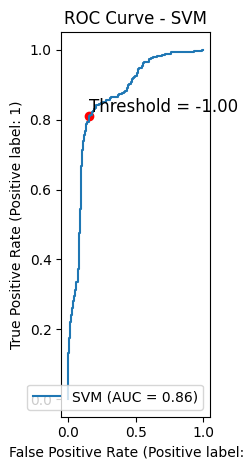

In [83]:
plt.subplot(1, 3, 3)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})")
plt.scatter(
    fpr_svm[best_threshold_index_svm], tpr_svm[best_threshold_index_svm], color="red"
)
plt.text(
    fpr_svm[best_threshold_index_svm],
    tpr_svm[best_threshold_index_svm],
    f"Threshold = {best_threshold_svm:.2f}",
    fontsize=12,
    verticalalignment="bottom",
)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

- AUC value of 0.86 ,suggests that the SVM model is effective at distinguishing between positive and negative classes(the better the model is at classification).



# P-R CURVES

In [84]:
y_true = y_test
y_scores = model.predict_proba(X_test)[:, 1]

In [85]:

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [86]:
pr_auc = auc(recall, precision)
pr_auc

np.float64(0.4852101756540877)

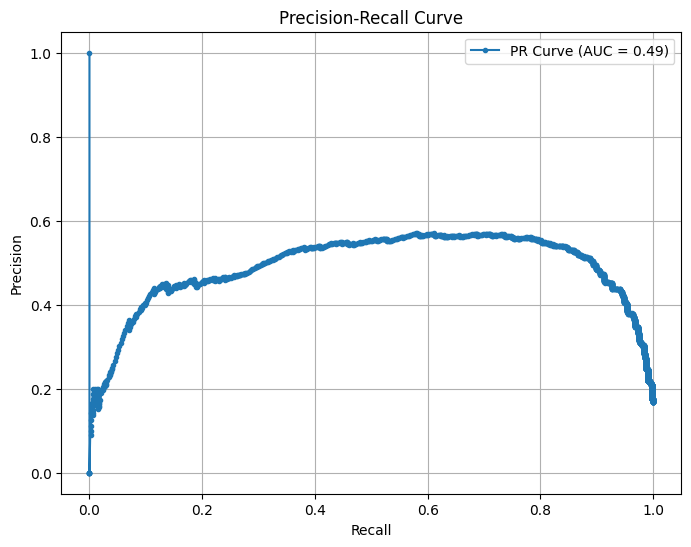

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {precision[optimal_idx]:.2f}")
print(f"Recall at optimal threshold: {recall[optimal_idx]:.2f}")

Optimal Threshold: 0.90
Precision at optimal threshold: 0.00
Recall at optimal threshold: 0.00


C:\Users\GASTO\AppData\Local\Temp\ipykernel_15476\155995870.py:1: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [115]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [118]:
clf = DecisionTreeClassifier()

In [116]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [ 10, 50], 
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [3,6 ]
     
}     

In [131]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='recall')

In [132]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50], 'min_samples_leaf': [3, 6],
                         'min_samples_split': [2, 5]},
             scoring='recall')

In [122]:
best_params_random = grid_search.best_params_
best_params_random

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [123]:
best_model_random = grid_search.best_estimator_
best_model_random

DecisionTreeClassifier(max_depth=50, min_samples_leaf=3)

In [124]:
best_score_random = grid_search.best_score_
best_score_random

np.float64(0.9177881362303586)

In [139]:
random_search=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,cv=5,scoring='f1',n_iter=15)

In [140]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50],
                                        'min_samples_leaf': [3, 6],
                                        'min_samples_split': [2, 5]},
                   scoring='f1')

In [141]:
best_score_random = random_search.best_score_
best_score_random

np.float64(0.9386451556448691)

In [142]:
best_params_random = random_search.best_params_
best_params_random

{'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'gini'}

: 